# Weather Photo Classification


This exercise uses the _Weather phenomenon database (WEAPD)_ to train a weather photo classifier.

Dataset source: Xiao, Haixia, 2021, "Weather phenomenon database (WEAPD)", https://doi.org/10.7910/DVN/M8JQCR, Harvard Dataverse, V1


## Download the Dataset

Download the dataset from https://www.kaggle.com/datasets/jehanbhathena/weather-dataset/data

1. Download the dataset ZIP file to your computer
2. Upload the ZIP file to this directory.
Verify the upload progress at the bottom tool bar.
3. When the upload is complete, unzip the file

In [1]:
!unzip archive.zip

Archive:  archive.zip
replace dataset/dew/2208.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Import the required files for this exercise

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Data Inspection 

Explore the directory structure.
The dataset organizes files by using one directory per class.

In [2]:
!ls -l  dataset

total 200
drwxrwsr-x. 2 1003310000 1003310000 20480 Oct  9 12:30 dew
drwxrwsr-x. 2 1003310000 1003310000 20480 Oct  9 12:30 fogsmog
drwxrwsr-x. 2 1003310000 1003310000 12288 Oct  9 12:30 frost
drwxrwsr-x. 2 1003310000 1003310000 20480 Oct  9 12:30 glaze
drwxrwsr-x. 2 1003310000 1003310000 20480 Oct  9 12:30 hail
drwxrwsr-x. 2 1003310000 1003310000 12288 Oct  9 12:30 lightning
drwxrwsr-x. 2 1003310000 1003310000 16384 Oct  9 12:30 rain
drwxrwsr-x. 2 1003310000 1003310000  4096 Oct  9 12:30 rainbow
drwxrwsr-x. 2 1003310000 1003310000 36864 Oct  9 12:30 rime
drwxrwsr-x. 2 1003310000 1003310000 20480 Oct  9 12:30 sandstorm
drwxrwsr-x. 2 1003310000 1003310000 20480 Oct  9 12:30 snow


In [3]:
ls -l dataset/rain | head -4

total 33124
-rw-rw-r--. 1 1003310000 1003310000  492633 Nov 26  2021 1011.jpg
-rw-rw-r--. 1 1003310000 1003310000   27969 Nov 26  2021 1013.jpg
-rw-rw-r--. 1 1003310000 1003310000  128174 Nov 26  2021 1017.jpg
ls: write error: Broken pipe


Count the number of images

In [4]:
datadir = Path("dataset")
len(list(datadir.glob("*/*.jpg")))

6862

### Images
Display one of the images in the dataset:

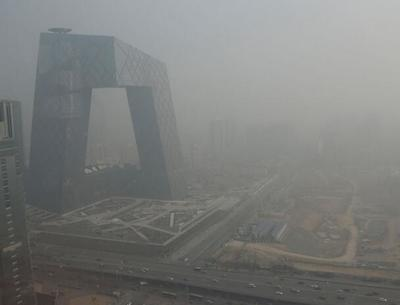

In [5]:
filename = "dataset/fogsmog/4902.jpg"
image =PIL.Image.open(filename)
image

In [6]:
image.size

(400, 305)

## Data Preparation

Load the data in train and validation splits.

In [62]:
batch_size = 9
img_height = 128
img_width = 128

train_data = tf.keras.utils.image_dataset_from_directory(
  datadir,
  validation_split=0.2,
  subset="training",
  seed=83,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_data = tf.keras.utils.image_dataset_from_directory(
  datadir,
  validation_split=0.2,
  subset="validation",
  seed=83,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6862 files belonging to 11 classes.
Using 5490 files for training.
Found 6862 files belonging to 11 classes.
Using 1372 files for validation.


In [63]:
classes = train_data.class_names
print(classes)

['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']


Visualize some images in the training set:

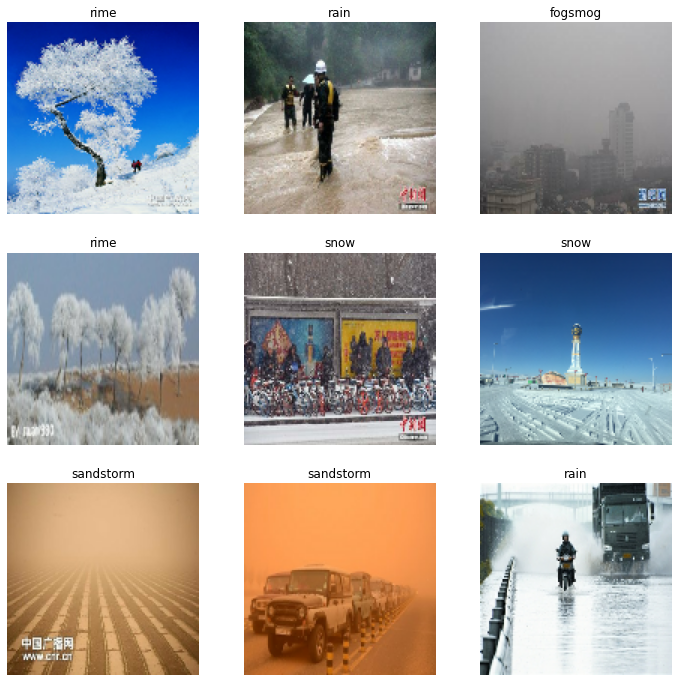

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")

## Training

Create the neural network

In [48]:
num_classes = len(classes)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile the model

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 64)         

Train the model

In [50]:
epochs = 10

history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/10
610/610 [==============================] - 6s 10ms/step - loss: 1.3872 - accuracy: 0.5290 - val_loss: 1.1037 - val_accuracy: 0.6217
Epoch 2/10
610/610 [==============================] - 6s 10ms/step - loss: 1.0797 - accuracy: 0.6313 - val_loss: 1.1138 - val_accuracy: 0.6050
Epoch 3/10
610/610 [==============================] - 6s 10ms/step - loss: 0.9812 - accuracy: 0.6654 - val_loss: 0.9942 - val_accuracy: 0.6618
Epoch 4/10
610/610 [==============================] - 6s 10ms/step - loss: 0.9425 - accuracy: 0.6792 - val_loss: 1.0375 - val_accuracy: 0.6589
Epoch 5/10
610/610 [==============================] - 6s 10ms/step - loss: 0.8734 - accuracy: 0.7035 - val_loss: 0.9307 - val_accuracy: 0.6757
Epoch 6/10
610/610 [==============================] - 6s 10ms/step - loss: 0.8229 - accuracy: 0.7208 - val_loss: 0.9002 - val_accuracy: 0.6968
Epoch 7/10
610/610 [==============================] - 6s 10ms/step - loss: 0.7657 - accuracy: 0.7404 - val_loss: 0.8969 - val_accuracy: 0.6888

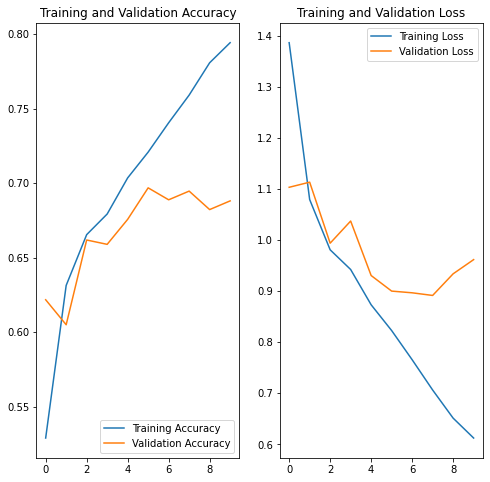

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Testing with new image



  16384/Unknown - 0s 0us/step

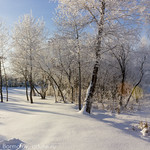

In [60]:
new_photo_url = "https://live.staticflickr.com/650/23409765562_ec009c0d08_q_d.jpg"
new_photo_path = tf.keras.utils.get_file(None, origin=new_photo_url)

PIL.Image.open(new_photo_path)

In [61]:
img = tf.keras.utils.load_img(
    new_photo_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to snow with a 75.16 percent confidence.
